<a href="https://colab.research.google.com/github/Aayush121202/Reinforcement_Learning/blob/main/Windy_Gridworld.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import pylab as pl
import matplotlib.pyplot as plt
import time # We will use this to time our experiments for various observations

%matplotlib inline

In [2]:
class gridWorld(object):

    def __init__(self):
        super(gridWorld, self).__init__()
        self.start = 0
        self.goal = 0
        # Provide the setting of gridWorld rows and columns
        self.row = 7
        self.col = 10
        self.x_max = self.col - 1
        self.y_max = self.row - 1
        # Declare windy columns and their effect
        self.wind_1 = [3, 4, 5, 8]
        self.wind_2 = [6, 7]
        # Provide action list : Up/Down/Left/Right
        self.actions_list = ['N', 'E', 'S', 'W']

    def cell(self,pos):
        return pos[1] + self.col * pos[0]

    def setTerminal(self, startState, goalState):
        # startState and goalState are tuples
        self.start = self.cell(startState)
        self.goal = self.cell(goalState)

    def nextState(self, state, action):
        # The "state" parameter is an integer that represents position in grid
        x = state % self.col
        y = (state - x) / self.col
        # Now let's define and interpret actions
        del_x = 0
        del_y = 0
        if action == 'E':
            del_x = 1
        elif action == 'W':
            del_x = -1
        elif action == 'N':
            del_y = -1
        elif action == 'S':
            del_y = 1
        else:
            raise('Invalid action! Actions taken must be in: ',self.actions_list)
        # Now move to new position
        new_x = max(0, min(x + del_x, self.x_max))
        new_y = max(0, min(y + del_y, self.y_max))
        # When wind blows to a new state
        if new_x in self.wind_1:
            new_y = max(0, new_y - 1)
        if new_x in self.wind_2:
            new_y = max(0, new_y - 2)
        # now let's return these new state values
        return self.cell((new_y,new_x))

    def checkTerminal(self, state):
        return state == self.goal

    def rewardFunction(self, state_prime):
        # When it reaches goal state then reward is 0 else all actions should yield -1
        if state_prime == self.goal:
            return 0
        else:
            return -1


def trajectoryPath(world, traj):
    # Initialize gridworld
    world_map = np.zeros((world.row, world.col))
    for i,state in enumerate(traj):
        x = int(state % world.col)
        y = int((state - x) / world.col)
        world_map[y, x] = i + 1
    print(world_map)
    print("\n")

In [3]:
def gridWorld_SARSA(world, startState, goalState, alpha=0.1, gamma=1, epsilon=0.1):
    # Consider input parameters:
    # gamma = 1 as discounted factor
    # default values of alpha and epsilon considered, it will be changed for multiple analysis
    world.setTerminal(startState, goalState)
    # Initialize Q(s,a)
    q_table = {}
    for state in range(world.row * world.col):
        q_table[state] = {}
        for act in world.actions_list:
            q_table[state][act] = 0

    # function for greedy action
    def epsGreedy(episode, q_dict):
        def greedyAct(_q_dict):
            greedy_act = ''
            max_q = -1e10
            for act in world.actions_list:
                if _q_dict[act] > max_q:
                    greedy_act = act
                    max_q = _q_dict[act]
            return greedy_act

        m = len(world.actions_list)
        greedy_act = greedyAct(q_dict)
        p = []
        for act in world.actions_list:
            if act == greedy_act:
                p.append((epsilon * 1. / m) + 1 - epsilon)
            else:
                p.append(epsilon * 1. / m)
        choice = np.random.choice(world.actions_list,size = 1, p = p)
        return choice[0]

    ep = 1 # Episode number
    ep_max = 300 # number of max episodes
    step_ep_list = []
    step = 0
    while ep < ep_max:
        #print("Episode: ", ep)
        # Initialize state
        state = world.cell(startState)
        trajectory = [state]
        # Choose action from state
        act = epsGreedy(ep, q_table[state])
        while not world.checkTerminal(state):
            state_prime = world.nextState(state, act)
            reward = world.rewardFunction(state_prime)
            act_prime = epsGreedy(ep, q_table[state_prime])
            q_table[state][act] += alpha * (reward + gamma * q_table[state_prime][act_prime] - q_table[state][act])
            state = state_prime
            act = act_prime
            # Increase Step Counter
            step += 1
            # Store the index of the episode of this time step
            step_ep_list.append(ep)
            # Update the trajectory
            trajectory.append(state)

        if ep == (ep_max - 1):
            trajectoryPath(world, trajectory)
        # Increase the episode counter
        ep += 1

    start_time = time.time()
    plt.plot(step_ep_list)
    print("Time elapsed is (in Secs): ", time.time() - start_time)
    plt.title('WindyGridWorld_SARSA ', fontsize = 'large')
    plt.xlabel("Number of Steps taken")
    plt.ylabel("Number of Episodes")
    plt.show()

Plot for Option: ∈=0.1,α=0.5 

[[ 6.  0.  0. 10. 11. 12. 13. 14. 16. 17.]
 [ 7.  8.  9.  0.  0.  0.  0.  0.  0. 18.]
 [ 2.  0.  0.  0.  0.  0.  0.  0.  0. 19.]
 [ 1.  0.  0.  0.  0.  0.  0. 40. 25. 26.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 36.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 39. 37.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 38.]]


Time elapsed is (in Secs):  0.02170419692993164


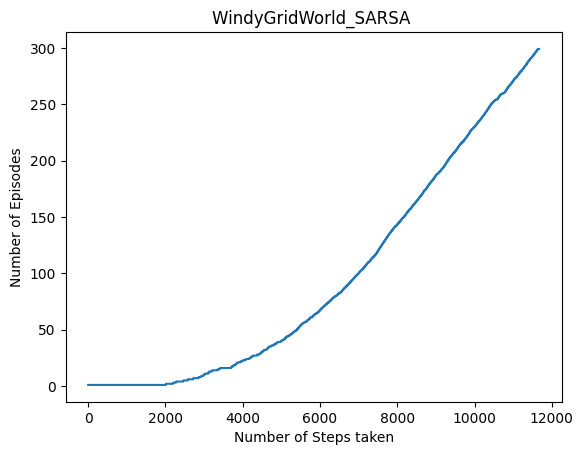

In [4]:
if __name__ == '__main__':
    startState = (3, 0)
    goalState = (3, 7)
    world = gridWorld()
    print("Plot for Option: ∈=0.1,α=0.5 \n")
    gridWorld_SARSA(world, startState, goalState, alpha=0.5, epsilon=0.1)